This project is the first project for time series analysis. The data is downloaded from https://github.com/SwatiInd/ThinkStats2/blob/master/code/mj-clean.csv This data was collected by Zachary M. Jones, a researcher in political science who studies the black market for cannabis in the U.S. (http://zmjones.com/marijuana).

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
transactions = pd.read_csv('mj-clean.csv', parse_dates = [5])

In [8]:
transactions.shape

(147070, 10)

In [4]:
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-02-09,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-02-09,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-02-09,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-02-09,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-02-09,15.54,North Carolina,36.217052,-81.687983


In [6]:
transactions.isnull().sum()

city            0
state           0
price           0
amount          0
quality         0
date            0
ppg             0
state.name      0
lat           173
lon           173
dtype: int64

In [10]:
transactions['quality'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [11]:
transactions.groupby('quality')

1. Only latitude and longitude values are missing, we may not require them in our analysis and therefore, we are not bothered to fill them. 
2. Usually, time series dataset are equally spaced in time but in this one, uneven transactions took place on each day. Many methods used for time series analysis is based on equally spaced. Here, we are dividing the data grouping by quality and day.

In [21]:
np.timedelta64(1, 'Y')

numpy.timedelta64(1,'Y')

In [29]:
def groupbyday(transactions, func = np.mean):
    grouped = transactions[['date','ppg']].groupby('date')
    daily = grouped.aggregate(np.mean)
    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y') #Representation of 1 year time
    daily['year'] = (daily['date']-start)/one_year # Year is fraction of the year time from the start date.
    return daily
# groupbyday(transactions, func = np.mean)

# The function can return the groups by quality. In this we would pass groups based on the dates.
def groupbyqualityandday(transactions):
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups: # name is the group name (high, low, medium)
        dailies[name] = groupbyday(group)
    return dailies
dailies = groupbyqualityandday(transactions)

## Plotting 


In [33]:
dailies

{'high':                   ppg       date      year
 date                                      
 2010-01-10  13.169030 2010-01-10  0.000000
 2010-01-11  13.396190 2010-01-11  0.002738
 2010-01-12  13.697857 2010-01-12  0.005476
 2010-02-09  13.384186 2010-02-09  0.082137
 2010-02-10  13.002157 2010-02-10  0.084875
 ...               ...        ...       ...
 2014-12-01  11.042456 2014-12-01  4.889902
 2014-12-02  11.299467 2014-12-02  4.892640
 2014-12-03  10.845500 2014-12-03  4.895378
 2014-12-04  11.720645 2014-12-04  4.898116
 2014-12-05  10.578293 2014-12-05  4.900854
 
 [1241 rows x 3 columns],
 'low':                  ppg       date      year
 date                                     
 2010-01-10  4.352857 2010-01-10  0.000000
 2010-01-11  3.319231 2010-01-11  0.002738
 2010-01-12  8.405000 2010-01-12  0.005476
 2010-02-09  4.943750 2010-02-09  0.082137
 2010-02-10  4.425385 2010-02-10  0.084875
 ...              ...        ...       ...
 2014-12-01  3.530000 2014-12-01  4.88990

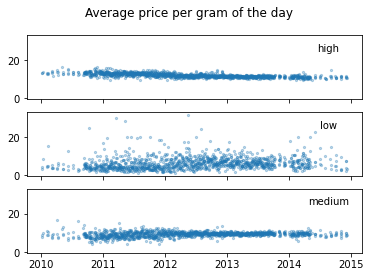

In [64]:
fig, axs = plt.subplots(3, sharey = True, sharex = True)
for i, (name, daily) in enumerate(dailies.items()):
    fig.suptitle('Average price per gram of the day')
    axs[i].scatter(daily.index, daily.ppg, label = name, s = 5, alpha = 0.3)
    axs[i].text(0.9, 0.8, name, horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)


From 2010 to 20111 and then, 2014 to 15, there are less number of data points.

## Moving Averages

In [79]:
dailies['high'].shape

(1241, 3)

In [80]:
dates = pd.date_range(dailies['high'].index.min(), dailies['high'].index.max())
len(dates)

1791

There are 1791-1241 = 550 days are missing within 5 years for unknown reason. We will 